In [128]:
!pip install mediapipe opencv-python pandas scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [129]:
pip install -U scikit-learn scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 857.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 3.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import mediapipe as mp
import cv2 

In [32]:
# Drawing helpers and Mediapipe Solutions
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 

## 1. Dibujar landmarks con mediapipe 

In [132]:
# Inicializa la captura de video desde la webcam
cap = cv2.VideoCapture(0)

# Inicia el modelo Holistic de mediapipe para la detección de landmarks
# Los argumentos  min_detection_confidence y min_tracking_confidence  establecen los umbrales de confianza mínimos requeridos 
#para la detección y el seguimiento de landmarks en una imagen.
#min_detection_confidence: Este argumento establece el umbral de confianza mínimo necesario para que el modelo Holistic detecte un landmark en la imagen. Un valor más alto significa que el modelo solo detectará landmarks con una confianza muy alta, mientras que un valor más bajo permitirá detectar landmarks con una confianza más baja.
#min_tracking_confidence: Este argumento establece el umbral de confianza mínimo para el seguimiento de landmarks en imágenes sucesivas. Una vez que un landmark ha sido detectado en una imagen con una confianza superior a este umbral, el modelo intentará seguir ese landmark en imágenes posteriores. Un valor más alto aquí significa que el seguimiento se realizará solo para landmarks muy confiables, mientras que un valor más bajo permitirá un seguimiento incluso para landmarks menos confiables.
# Factore: buena iluminación, fondo simple, si se requiere precision : usar valores mas alto
# Un valor muy alto de confianza puede conducir a una menor cantidad de landmarks detectados y seguidos, lo que puede ser aceptable en algunos casos pero limitante en otros donde se necesite información más detallada.
#min_detection_confidence: deteccion
#min_tracking_confidence: seguimiento
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.6) as holistic: #probar: min_detection_confidence=0.7-0.9, min_tracking_confidence=0.5-0.8   0.5 y 0.8
    while cap.isOpened():  # Bucle principal para procesar cada fotograma de video
        ret, frame = cap.read()  # Lee un fotograma de la webcam
        
        # Recolor Feed
        # Convierte el fotograma de BGR a RGB para el procesamiento de mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False   # Marca la imagen como no modificable   
        
        # Make Detections
        # Procesa la imagen utilizando el modelo Holistic para detectar landmarks
        results = holistic.process(image)
        # print(results.face_landmarks) # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        # Muestra la imagen con los landmarks dibujados en una ventana
        cv2.imshow('Rosa Webcam', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [133]:
results.pose_landmarks

landmark {
  x: 0.57037145
  y: 0.6873029
  z: -0.6856758
  visibility: 0.9999716
}
landmark {
  x: 0.60380375
  y: 0.60369605
  z: -0.6380877
  visibility: 0.99993104
}
landmark {
  x: 0.62408423
  y: 0.6039457
  z: -0.63769394
  visibility: 0.99992675
}
landmark {
  x: 0.64527
  y: 0.6054025
  z: -0.63748634
  visibility: 0.9999211
}
landmark {
  x: 0.53439873
  y: 0.6009239
  z: -0.6374336
  visibility: 0.9999453
}
landmark {
  x: 0.5115608
  y: 0.60086644
  z: -0.63636214
  visibility: 0.9999475
}
landmark {
  x: 0.49153852
  y: 0.60181254
  z: -0.6365465
  visibility: 0.99995244
}
landmark {
  x: 0.67697406
  y: 0.6434162
  z: -0.31131518
  visibility: 0.99990886
}
landmark {
  x: 0.46387967
  y: 0.64159304
  z: -0.29931778
  visibility: 0.9999618
}
landmark {
  x: 0.6061746
  y: 0.80100167
  z: -0.5617591
  visibility: 0.9999484
}
landmark {
  x: 0.5329732
  y: 0.79118747
  z: -0.55766135
  visibility: 0.99996185
}
landmark {
  x: 0.79834056
  y: 1.0917279
  z: -0.12216238
  visi

In [134]:
results.face_landmarks.landmark[0].visibility # visibility muestra si el landmark si se muestra en la pantalla o no
# para los landmarks de la cara siempre sera cero

0.0

## 2. Capturar Landmarks & Exportar CSV

In [135]:
import csv
import os
import numpy as np

In [136]:
num_coords = len(results.face_landmarks.landmark) + len(results.pose_landmarks.landmark)
num_coords #501

501

In [137]:
#Create header table | class | x | y | z | visibility |
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [138]:
len(landmarks) #2005

2005

In [139]:
#Export header CSV
with open('temporalidad_1_0.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

## 3. Tomar coordenadas de señas

In [140]:
#Save coord poses
class_name="aveces"

#Detectar puntos de referencia
cap = cv2.VideoCapture(0)  #0 o 2

# Inicializar el tiempo de inicio
inicio_tiempo = cv2.getTickCount()

# Initiate holistic model
#min_detection_confidence: deteccion
#min_tracking_confidence: seguimiento
with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.8) as holistic: #probar: min_detection_confidence=0.7-0.9, min_tracking_confidence=0.5-0.8

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)

        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )

        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates, da todos los landmarks y los almacena en una matriz
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

            # Concate rows
            row = pose_row+face_row

            # Append class name
            row.insert(0, class_name)

            # Export to CSV
            with open('temporalidad_1_0.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row)

        except:
            pass

        ##cv2.imshow('Rosa Webcam', image)
        ##if cv2.waitKey(10) & 0xFF == ord('q'):
        ##    break
        # Calcular el tiempo transcurrido
        tiempo_transcurrido = (cv2.getTickCount() - inicio_tiempo) / cv2.getTickFrequency()

        # Mostrar la imagen y salir si pasa el tiempo límite o se presiona 'q'
        cv2.imshow('Rosa Webcam', image)
        if tiempo_transcurrido >= 60 or cv2.waitKey(10) & 0xFF == ord('q'):
            break
        

cap.release()
cv2.destroyAllWindows()


## 4. Entrenar modelo usando Scikit Learn

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('data/temporalidad_1.csv')

In [33]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,ayer,0.531512,0.444552,-0.628866,0.999982,0.558667,0.390358,-0.571893,0.999950,0.573240,...,0.002032,0.0,0.586263,0.369453,0.015787,0.0,0.591011,0.364649,0.016186,0.0
1,ayer,0.523760,0.446381,-0.863971,0.999979,0.555421,0.390054,-0.809736,0.999940,0.570746,...,0.002171,0.0,0.585872,0.367204,0.016905,0.0,0.590366,0.363378,0.017241,0.0
2,ayer,0.520142,0.449467,-0.910053,0.999976,0.553396,0.390142,-0.857819,0.999930,0.569037,...,0.002352,0.0,0.585525,0.366949,0.017286,0.0,0.589961,0.363065,0.017627,0.0
3,ayer,0.518826,0.453118,-0.833561,0.999973,0.552243,0.391160,-0.780878,0.999921,0.567922,...,0.002106,0.0,0.586479,0.367533,0.016694,0.0,0.590912,0.363730,0.017028,0.0
4,ayer,0.516062,0.455297,-0.796919,0.999972,0.550848,0.391820,-0.745363,0.999919,0.567112,...,0.002066,0.0,0.586989,0.367449,0.016398,0.0,0.591427,0.363495,0.016752,0.0


In [34]:
df['class'].unique()

array(['ayer', 'hoy', 'dia'], dtype=object)

In [35]:
X = df.drop('class', axis=1) # coordenadas
y = df['class'] # clase

In [36]:
print(y.value_counts())

class
hoy     448
ayer    443
dia     434
Name: count, dtype: int64


In [37]:
y #X = coords , y = class

0       ayer
1       ayer
2       ayer
3       ayer
4       ayer
        ... 
1320     dia
1321     dia
1322     dia
1323     dia
1324     dia
Name: class, Length: 1325, dtype: object

train_test_split(): dividide los datos en conjuntos de entrenamiento y prueba.
- test_size: Es el tamaño que se desea para el conjunto de prueba. Se establece en 0.3, lo que significa que el 30% de los datos se asignarán al conjunto de prueba, y el 70% restante se utilizará para entrenamiento.
- random_state: Este parámetro se utiliza para inicializar el generador de números aleatorios interno, lo que garantiza que la división de los datos sea reproducible

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) #

In [43]:
print(y_train.value_counts())

class
hoy     313
ayer    310
dia     304
Name: count, dtype: int64


In [44]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
972,0.564674,0.425569,-0.623099,0.999980,0.592938,0.384529,-0.557895,0.999944,0.605902,0.386720,...,0.001827,0.0,0.615644,0.366019,0.012623,0.0,0.619819,0.362043,0.012786,0.0
1136,0.471239,0.390609,-0.738979,0.999977,0.498408,0.346897,-0.656310,0.999925,0.512375,0.349970,...,0.002674,0.0,0.518166,0.342136,0.015518,0.0,0.522523,0.337816,0.015871,0.0
89,0.518703,0.404270,-0.680842,0.999979,0.546663,0.357932,-0.619685,0.999943,0.562078,0.359895,...,0.001965,0.0,0.572979,0.351743,0.014112,0.0,0.577438,0.347851,0.014399,0.0
605,0.557438,0.407881,-0.737124,0.999968,0.581438,0.360108,-0.669506,0.999935,0.592866,0.361468,...,0.002839,0.0,0.606848,0.350973,0.016140,0.0,0.611821,0.346149,0.016528,0.0
931,0.528651,0.414936,-0.562856,0.999997,0.557366,0.372547,-0.490887,0.999987,0.570341,0.374973,...,0.002034,0.0,0.572547,0.359531,0.009300,0.0,0.576777,0.356184,0.009059,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,0.564362,0.422948,-0.670775,0.999984,0.592176,0.380153,-0.601312,0.999953,0.605330,0.381676,...,0.002480,0.0,0.616321,0.366863,0.014280,0.0,0.620567,0.362840,0.014578,0.0
439,0.532553,0.402641,-0.651710,0.999985,0.555587,0.353080,-0.589937,0.999967,0.570084,0.354109,...,0.004239,0.0,0.589004,0.352026,0.018084,0.0,0.593567,0.347478,0.018671,0.0
396,0.529329,0.425988,-0.798989,0.999941,0.556671,0.370912,-0.743185,0.999861,0.570122,0.372734,...,0.004616,0.0,0.590955,0.346127,0.019234,0.0,0.595765,0.341817,0.019765,0.0
411,0.530805,0.403402,-0.641671,0.999954,0.555679,0.355335,-0.579577,0.999889,0.569379,0.357035,...,0.004193,0.0,0.584080,0.345070,0.017401,0.0,0.588513,0.341619,0.017844,0.0


In [45]:
y_train

972      dia
1136     dia
89      ayer
605      hoy
931      dia
        ... 
975      dia
439     ayer
396     ayer
411     ayer
874      hoy
Name: class, Length: 927, dtype: object

## Enrenamiento modelos de clasificación de aprendizaje automático

In [46]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [47]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=500)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'svm':make_pipeline(StandardScaler(), SVC())
}

In [48]:
pipelines.keys()

dict_keys(['lr', 'rc', 'rf', 'gb', 'svm'])

In [49]:
list(pipelines.values())[0]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=500))])

## Entrenamiento de los 5 modelos de clasificacion

In [50]:
print(y_train.value_counts())

class
hoy     313
ayer    310
dia     304
Name: count, dtype: int64


In [51]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
972,0.564674,0.425569,-0.623099,0.999980,0.592938,0.384529,-0.557895,0.999944,0.605902,0.386720,...,0.001827,0.0,0.615644,0.366019,0.012623,0.0,0.619819,0.362043,0.012786,0.0
1136,0.471239,0.390609,-0.738979,0.999977,0.498408,0.346897,-0.656310,0.999925,0.512375,0.349970,...,0.002674,0.0,0.518166,0.342136,0.015518,0.0,0.522523,0.337816,0.015871,0.0
89,0.518703,0.404270,-0.680842,0.999979,0.546663,0.357932,-0.619685,0.999943,0.562078,0.359895,...,0.001965,0.0,0.572979,0.351743,0.014112,0.0,0.577438,0.347851,0.014399,0.0
605,0.557438,0.407881,-0.737124,0.999968,0.581438,0.360108,-0.669506,0.999935,0.592866,0.361468,...,0.002839,0.0,0.606848,0.350973,0.016140,0.0,0.611821,0.346149,0.016528,0.0
931,0.528651,0.414936,-0.562856,0.999997,0.557366,0.372547,-0.490887,0.999987,0.570341,0.374973,...,0.002034,0.0,0.572547,0.359531,0.009300,0.0,0.576777,0.356184,0.009059,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,0.564362,0.422948,-0.670775,0.999984,0.592176,0.380153,-0.601312,0.999953,0.605330,0.381676,...,0.002480,0.0,0.616321,0.366863,0.014280,0.0,0.620567,0.362840,0.014578,0.0
439,0.532553,0.402641,-0.651710,0.999985,0.555587,0.353080,-0.589937,0.999967,0.570084,0.354109,...,0.004239,0.0,0.589004,0.352026,0.018084,0.0,0.593567,0.347478,0.018671,0.0
396,0.529329,0.425988,-0.798989,0.999941,0.556671,0.370912,-0.743185,0.999861,0.570122,0.372734,...,0.004616,0.0,0.590955,0.346127,0.019234,0.0,0.595765,0.341817,0.019765,0.0
411,0.530805,0.403402,-0.641671,0.999954,0.555679,0.355335,-0.579577,0.999889,0.569379,0.357035,...,0.004193,0.0,0.584080,0.345070,0.017401,0.0,0.588513,0.341619,0.017844,0.0


In [52]:
y_train

972      dia
1136     dia
89      ayer
605      hoy
931      dia
        ... 
975      dia
439     ayer
396     ayer
411     ayer
874      hoy
Name: class, Length: 927, dtype: object

In [53]:
fit_models = {}
predictions = {}
for clave_model, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fit_models[clave_model] =  model
    predictions[clave_model] = y_pred
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=500))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

## Predicciones para evaluar modelos

In [67]:
predictions

{'lr': array(['dia', 'hoy', 'hoy', 'ayer', 'hoy', 'hoy', 'dia', 'hoy', 'dia',
        'dia', 'hoy', 'ayer', 'hoy', 'ayer', 'hoy', 'hoy', 'hoy', 'hoy',
        'dia', 'ayer', 'hoy', 'dia', 'ayer', 'hoy', 'ayer', 'ayer', 'ayer',
        'ayer', 'dia', 'hoy', 'ayer', 'hoy', 'hoy', 'ayer', 'dia', 'dia',
        'ayer', 'hoy', 'hoy', 'ayer', 'ayer', 'ayer', 'hoy', 'hoy', 'dia',
        'dia', 'dia', 'ayer', 'hoy', 'dia', 'dia', 'dia', 'ayer', 'ayer',
        'hoy', 'dia', 'dia', 'hoy', 'hoy', 'hoy', 'hoy', 'dia', 'hoy',
        'ayer', 'ayer', 'ayer', 'ayer', 'ayer', 'dia', 'dia', 'hoy', 'dia',
        'ayer', 'hoy', 'ayer', 'hoy', 'dia', 'dia', 'hoy', 'dia', 'ayer',
        'dia', 'hoy', 'ayer', 'dia', 'ayer', 'dia', 'hoy', 'ayer', 'ayer',
        'hoy', 'hoy', 'ayer', 'hoy', 'dia', 'dia', 'ayer', 'hoy', 'hoy',
        'hoy', 'dia', 'hoy', 'ayer', 'ayer', 'hoy', 'ayer', 'hoy', 'dia',
        'hoy', 'hoy', 'ayer', 'hoy', 'dia', 'dia', 'ayer', 'dia', 'ayer',
        'dia', 'hoy', 'dia', 'aye

In [19]:
X_test

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
399,0.469054,0.302035,-0.510469,0.999995,0.497325,0.263026,-0.447973,0.999988,0.512417,0.266318,...,0.003408,0.0,0.520706,0.251522,0.020141,0.0,0.525203,0.247690,0.020632,0.0
620,0.476622,0.303663,-0.483167,0.999996,0.504600,0.265321,-0.414230,0.999989,0.519109,0.269261,...,0.004027,0.0,0.525438,0.259039,0.020913,0.0,0.530090,0.254763,0.021469,0.0
163,0.475425,0.308460,-0.571944,0.999990,0.498015,0.259737,-0.494867,0.999972,0.511303,0.262087,...,0.004106,0.0,0.521338,0.249990,0.021353,0.0,0.525798,0.246222,0.021867,0.0
674,0.469353,0.299599,-0.813084,0.999944,0.498491,0.252552,-0.736369,0.999826,0.513228,0.255259,...,0.001624,0.0,0.523867,0.236863,0.016580,0.0,0.528473,0.233439,0.016678,0.0
1902,0.483991,0.310195,-0.681719,0.999998,0.507417,0.262961,-0.622656,0.999996,0.521202,0.265311,...,0.003734,0.0,0.536406,0.255094,0.020065,0.0,0.540838,0.250774,0.020672,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0.511156,0.306331,-0.831394,0.999683,0.542408,0.251908,-0.776348,0.999142,0.560140,0.253980,...,0.003994,0.0,0.570258,0.219047,0.019969,0.0,0.575005,0.215344,0.020293,0.0
643,0.477634,0.304636,-0.448537,0.999996,0.505748,0.266999,-0.382716,0.999989,0.520836,0.271091,...,0.003291,0.0,0.527123,0.257941,0.020259,0.0,0.531611,0.254321,0.020700,0.0
512,0.485321,0.315676,-0.522923,0.999998,0.507900,0.270590,-0.462043,0.999993,0.521165,0.272074,...,0.004340,0.0,0.527881,0.261904,0.020487,0.0,0.533026,0.255921,0.021173,0.0
89,0.470307,0.294941,-0.578819,0.999988,0.492926,0.253087,-0.512805,0.999967,0.505913,0.256176,...,0.002376,0.0,0.512628,0.243176,0.018008,0.0,0.516953,0.239887,0.018335,0.0


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  classification_report #Metricas

In [55]:
y_test

893     dia
523     hoy
754     hoy
217    ayer
786     hoy
       ... 
274    ayer
232    ayer
447     hoy
548     hoy
881     hoy
Name: class, Length: 398, dtype: object

### Metricas: Accuracy, Precision, Recall

In [24]:
print(f"Tamaño de y_test: {len(y_test)}")
print(f"Tamaño de y_pred: {len(y_pred)}")


Tamaño de y_test: 604
Tamaño de y_pred: 604


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  classification_report #Metricas

# Calculate accuracy, precision y recall for each model
evaluations = {}
for clave_model, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Usamos output_dict=True para guardar los datos en formato diccionario
    evaluations[clave_model] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall']
    }

# Mostrar resultados
for clave_model, metrics in evaluations.items():
    print(f"Modelo: {clave_model}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precisión (weighted avg): {metrics['precision']}")
    print(f"Recall (weighted avg): {metrics['recall']}\n")


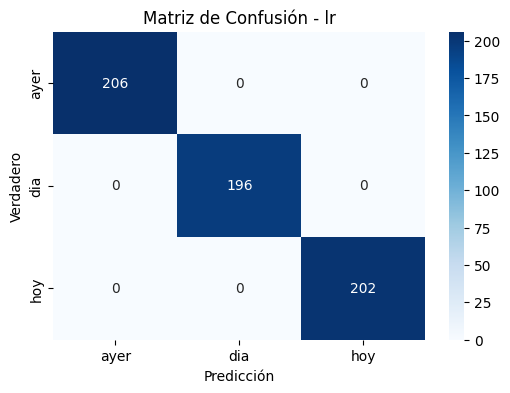

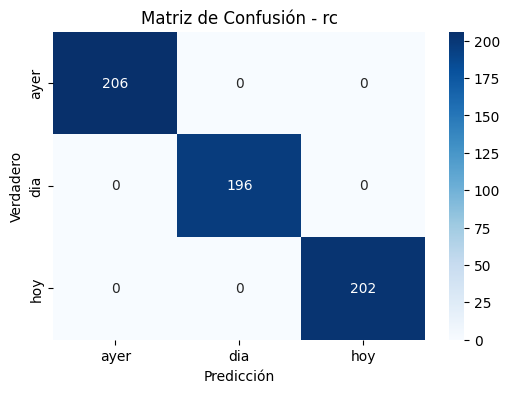

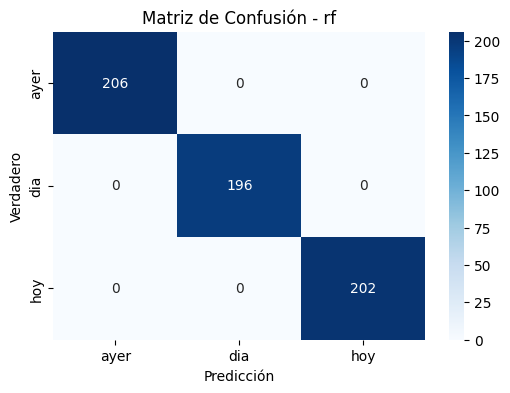

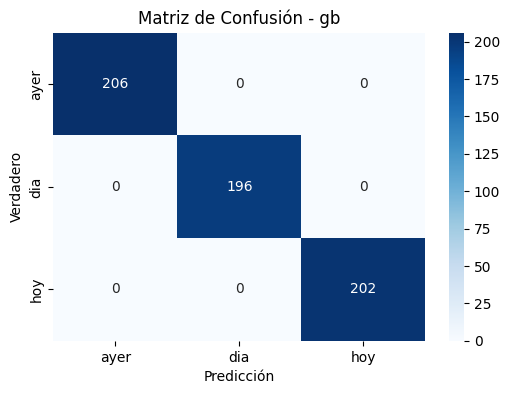

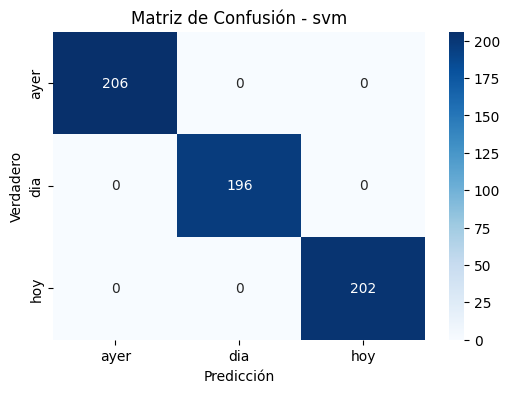

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear las matrices de confusión y visualizarlas
for clave_model, y_pred in predictions.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_,
            yticklabels=model.classes_)
    plt.title(f'Matriz de Confusión - {clave_model}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()


## Curvas de aprendizaje

In [30]:
print(y.value_counts())

class
ayer en la noche    673
ahora               672
semana              666
Name: count, dtype: int64


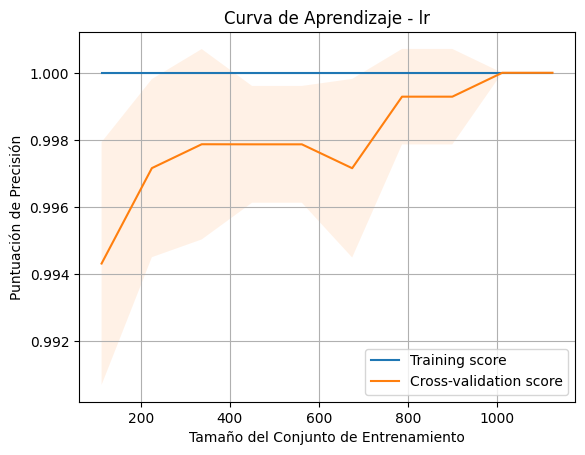

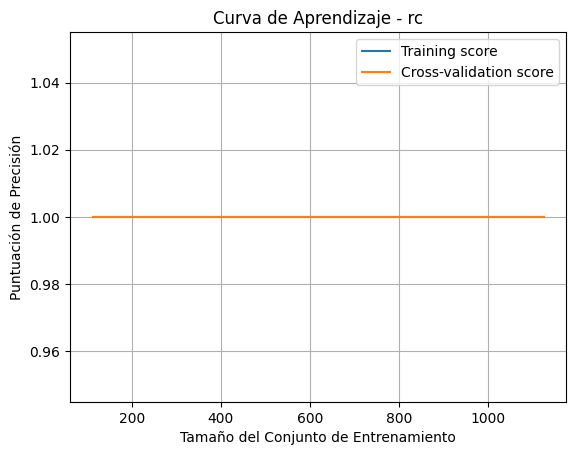

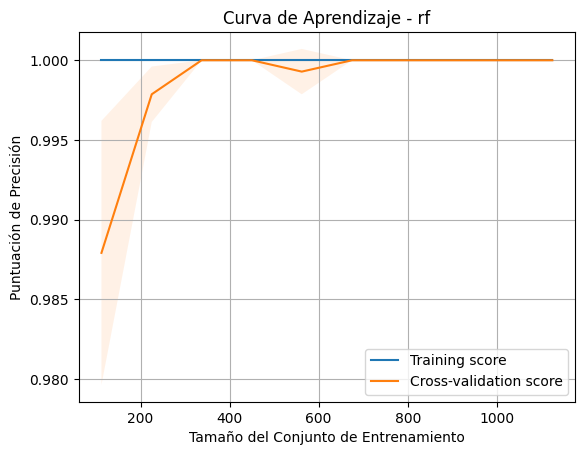

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Crear curvas de aprendizaje para cada modelo
for algo, model in fit_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calcular la media y la desviación estándar de los puntajes
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.title(f"Curva de Aprendizaje - {algo}")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación de Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [50]:
import pickle
# Guardar el modelo ya entrenado
with open('models_2/temporalidad_2.pkl', 'wb') as f: 
    pickle.dump(fit_models['rf'], f) 

## Cargar el modelo ya entrenado

In [1]:
import mediapipe as mp
import cv2 
import numpy as np
import pandas as pd
import pickle 
from collections import defaultdict
import warnings

In [2]:
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 

In [3]:
with open('models_2/temporalidad_2.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.6) as holistic:
    warnings.simplefilter("ignore")
    
    class_counts = defaultdict(int)
    max_prob_dict = defaultdict(float)
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
        
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            class_counts[body_language_class] += 1
            body_language_prob = model.predict_proba(X)[0]

            
            #print(body_language_class, body_language_prob)


            max_prob_value = np.max(body_language_prob)
            if max_prob_value > max_prob_dict.get(body_language_class, 0):
                max_prob_dict[body_language_class] = max_prob_value
            
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, ''
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, ''
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Rosa Webcam', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            if class_counts:
                print("Class Counts:")
                for cls, count in class_counts.items():
                    print(f"{cls}: {count}")
            
                # Frequent class
                most_frequent_class = max(class_counts, key=class_counts.get, default="Unknown")
                print(f"Most Frequent Class: {most_frequent_class} ({class_counts[most_frequent_class]})")
                
                # Print the total number of classes
                print(f"Total Unique Classes Detected: {len(class_counts)}")
                
                # Print the maximum probability and its associated class
                if max_prob_dict:
                    print("Max Probability for Each Class:")
                    for cls, prob in max_prob_dict.items():
                        print(f"{cls}: {prob:.2f}")
                #else:
                #    print("No valid class detected.")

            break

cap.release()
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Class Counts:
aveces: 212
anio: 41
mes: 60
Most Frequent Class: aveces (212)
Total Unique Classes Detected: 3
Max Probability for Each Class:
aveces: 0.82
anio: 0.57
mes: 0.43


: 